In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, skew, kurtosis
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
print(loan.info())
loan.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 43.2+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.00000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001790,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.24430,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.24876,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.00000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.00000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.50000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.25000,168.000000,360.00000,1.000000,NaN,NaN


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


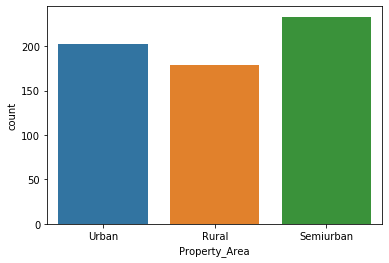

In [3]:
#unimodel visualization - categorical
print(loan['Property_Area'].value_counts())
sns.countplot(loan['Property_Area'])

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


Text(0.5, 0.98, 'Loan amount in 1000s')

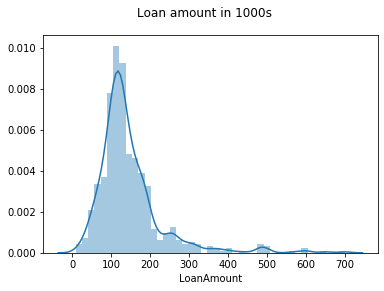

In [4]:
#unimodel visualization - numerical
print(loan["LoanAmount"].describe())
sns.distplot(loan['LoanAmount'])
plt.suptitle('Loan amount in 1000s')

0      (69.15, 27100.0]
1      (69.15, 27100.0]
2      (69.15, 27100.0]
3      (69.15, 27100.0]
4      (69.15, 27100.0]
             ...       
609    (69.15, 27100.0]
610    (69.15, 27100.0]
611    (69.15, 27100.0]
612    (69.15, 27100.0]
613    (69.15, 27100.0]
Name: ApplicantIncome, Length: 614, dtype: category
Categories (3, interval[float64]): [(69.15, 27100.0] < (27100.0, 54050.0] < (54050.0, 81000.0]]


Text(0.5, 0.98, 'Dependents Vs Applicant Income')

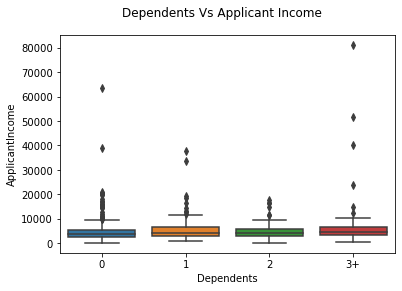

In [5]:
#bimodal visualization - (C-Q)
income_bins = pd.cut(loan['ApplicantIncome'], 3)
print(income_bins)
sns.boxplot(x='Dependents', y='ApplicantIncome', data=loan)
plt.suptitle("Dependents Vs Applicant Income")


Married
No     1316.558685
Yes    1794.630653
Name: CoapplicantIncome, dtype: float64
Married  CoapplicantIncome
No       0                    0.232899
         1666                 0.006515
         2083                 0.003257
         2531                 0.003257
         1213                 0.001629
                                ...   
Yes      8106                 0.001629
         8333                 0.001629
         10968                0.001629
         11300                0.001629
         20000                0.001629
Name: CoapplicantIncome, Length: 306, dtype: float64


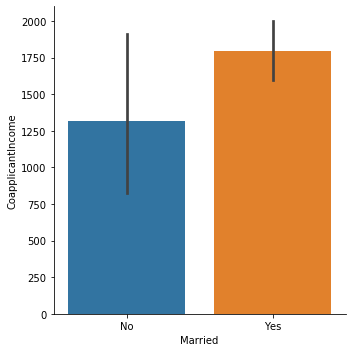

In [6]:
#bimodal visualization - (C-Q)
sns.catplot(x='Married', y='CoapplicantIncome', kind='bar', data=loan)
gp_inc = loan.groupby(by=['Married'])['CoapplicantIncome']
print(gp_inc.mean())
print(gp_inc.value_counts()/len(loan))

Text(0.5, 0.98, 'Loan Amount Vs Applicant Income')

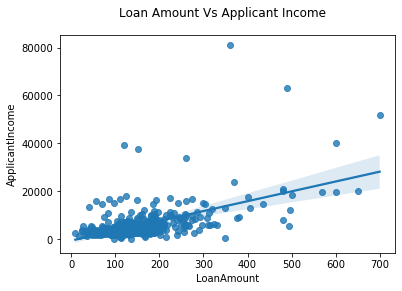

In [7]:
#bimodal visualization - (Q-Q)
sns.regplot(x="LoanAmount", y='ApplicantIncome', data=loan)
plt.suptitle("Loan Amount Vs Applicant Income")

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


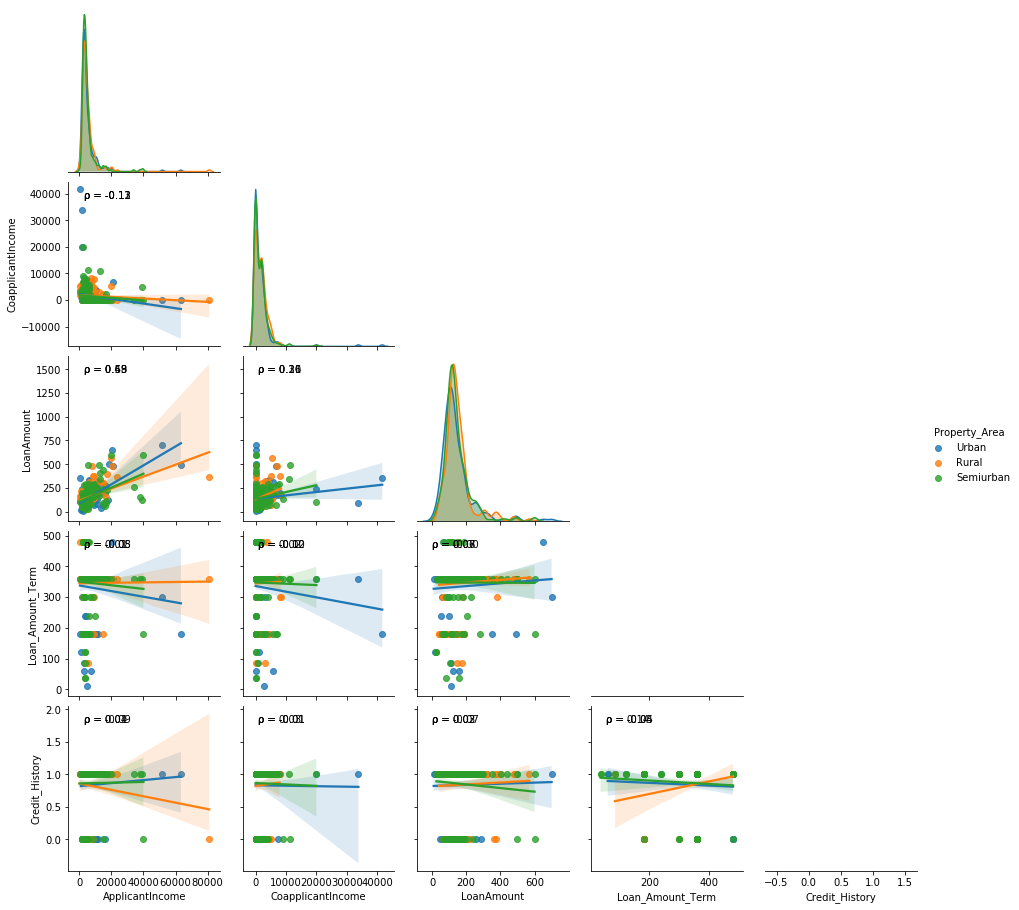

In [8]:
#Check correlation between continuous columns 
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(data=loan, corner=True, kind='reg', hue='Property_Area')
g.map_lower(corrfunc)


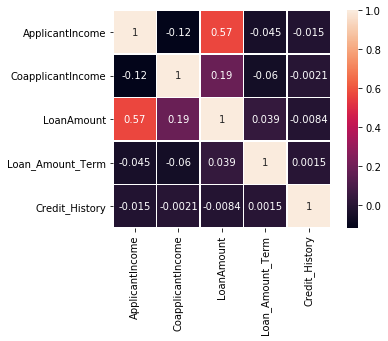

In [9]:
#heat map to check correlation
pear_corr = loan.corr(method='pearson') #kendall,spearman
sns.heatmap(pear_corr, square=True, linewidths=.5, annot=True)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64


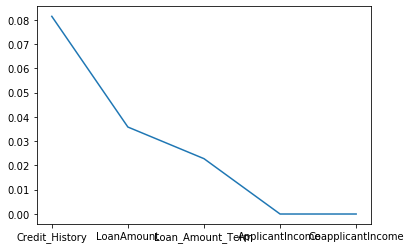

In [13]:
#check for missing values
loan_null = loan.isnull().sum().sort_values(ascending=False)
print(loan_null)
desc = loan.describe().T
desc["missing%"] = 1 - (desc['count']/ len(loan))
desc.sort_values(by="missing%", ascending= False, inplace=True)
plt.plot('missing%', data=desc)

In [14]:
#Missing value imputation
loan.dropna(how='any', axis=0, inplace=True)

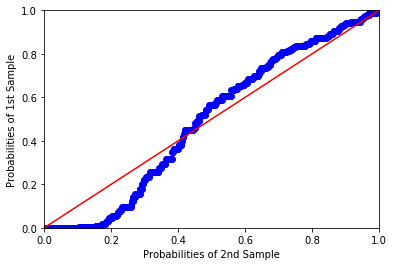

In [15]:
#probability plot
pp_x = sm.ProbPlot(loan.ApplicantIncome, fit=True)
pp_y = sm.ProbPlot(loan.LoanAmount, fit=True)
fig = pp_y.ppplot(line='45', other=pp_x)

In [16]:
#skewness & kurtosis
print("Skewness:",  skew(loan['LoanAmount']))
print("Kurtosis:",  kurtosis(loan['LoanAmount']))

Skewness: 2.3540509424728953
Kurtosis: 8.401937052352395


In [79]:
loan.std()

ApplicantIncome      5668.251251
CoapplicantIncome    2617.692797
LoanAmount             80.508164
Loan_Amount_Term       65.212401
Credit_History          0.353307
dtype: float64